## Star - Galaxy Classification using CNN

### Data Preprocessing :

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataframe = pd.read_csv('/datasets/galstar.csv')

In [3]:
dataframe.head(5)

,Unnamed: 0,y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
0,1,0,0.005208,0.005283,0.005284,0.005249,0.005268,0.005311,0.005342,0.005191,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
1,2,0,0.005264,0.005220,0.005248,0.005340,0.005237,0.005248,0.005251,0.005168,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
2,3,0,0.005314,0.005302,0.005279,0.005258,0.005294,0.005229,0.005281,0.005198,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
3,4,0,0.005190,0.005255,0.005213,0.005263,0.005296,0.005288,0.005243,0.005332,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
4,5,0,0.005163,0.005178,0.005284,0.005220,0.005249,0.005287,0.005210,0.005289,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257


In [4]:
dataframe.shape

(31798, 5410)

It seems we have 31,798 rows and 5410 columns. But what are those columns: 

1. Column 0 - Junk
2. Column 1 - Supervised Label
3. Columns 2 - 5409 - Band Information

We have 8 26 X 26 objects. 4 of them are Passthrough Bands. The other 4 are Point spread functions respectively.

In [5]:
#Removing Junk Column
df = dataframe.iloc[ : , 1 : ]

In [6]:
#Analyzing feature stats
df.describe()

,y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
count,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,...,3.179800e+04,3.179800e+04,3.179800e+04,3.179800e+04,3.179800e+04,3.179800e+04,3.179800e+04,3.179800e+04,3.179800e+04,3.179800e+04
mean,0.413013,0.005264,0.005265,0.005266,0.005266,0.005267,0.005268,0.005269,0.005269,0.005270,...,5.256670e-03,5.256658e-03,5.256643e-03,5.256625e-03,5.256612e-03,5.256582e-03,5.256568e-03,5.256549e-03,5.256530e-03,5.256514e-03
std,0.492383,0.000063,0.000064,0.000066,0.000068,0.000070,0.000073,0.000075,0.000079,0.000082,...,6.158411e-08,5.783880e-08,5.558277e-08,5.298286e-08,4.812237e-08,4.999746e-08,4.720081e-08,4.431712e-08,3.861720e-08,3.228661e-08
min,0.000000,0.004995,0.004933,0.004946,0.004965,0.004966,0.004981,0.004982,0.004907,0.005005,...,5.256309e-03,5.255966e-03,5.256173e-03,5.255910e-03,5.256314e-03,5.256180e-03,5.256238e-03,5.256146e-03,5.256209e-03,5.256261e-03
25%,0.000000,0.005242,0.005243,0.005243,0.005243,0.005244,0.005244,0.005244,0.005244,0.005245,...,5.256631e-03,5.256622e-03,5.256608e-03,5.256591e-03,5.256582e-03,5.256551e-03,5.256537e-03,5.256522e-03,5.256508e-03,5.256495e-03
50%,0.000000,0.005257,0.005257,0.005257,0.005258,0.005258,0.005259,0.005259,0.005260,0.005260,...,5.256665e-03,5.256656e-03,5.256639e-03,5.256622e-03,5.256609e-03,5.256582e-03,5.256565e-03,5.256547e-03,5.256530e-03,5.256512e-03
75%,1.000000,0.005287,0.005288,0.005288,0.005288,0.005289,0.005290,0.005291,0.005291,0.005291,...,5.256706e-03,5.256693e-03,5.256677e-03,5.256658e-03,5.256639e-03,5.256612e-03,5.256596e-03,5.256575e-03,5.256552e-03,5.256531e-03
max,1.000000,0.008870,0.008829,0.008702,0.008897,0.009152,0.009412,0.009700,0.009901,0.010127,...,5.257039e-03,5.257011e-03,5.257035e-03,5.256996e-03,5.256916e-03,5.256986e-03,5.256939e-03,5.256956e-03,5.256741e-03,5.256856e-03


In [7]:
#Checking for missing values
missing_df = 0
for column in df.columns : 
    if df[column].isna().sum() :
        missing_df = 1
        print(column + " : " + str(df[column].isna().sum()))
if not missing_df : print("No missing values")

No missing values


In [8]:
#Checking the class balance
print("Number of Stars : " + str(df[df['y'] == 0]['y'].count()) + " Percentage : " + str(df[df['y'] == 0]['y'].count()* 100  / df['y'].count()))
print("Number of Galaxy : " +  str(df[df['y'] == 1]['y'].count()) + " Percentage : " + str(df[df['y'] == 1]['y'].count()* 100  / df['y'].count()))

Number of Stars : 18665 Percentage : 58
Number of Galaxy : 13133 Percentage : 41


In [9]:
#Getting the mean values for both classes
def getImageFunction(label, function) :
    if function == "mean" : return df[df['y'] == label].iloc[ : , 1 : ].mean() 
    if function == "std"  : return df[df['y'] == label].iloc[ : , 1 : ].std() 

In [10]:
#Getting the mean values
mean_star = getImageFunction(label = 0, function = "mean")
mean_galaxy = getImageFunction(label = 1, function = "mean")

In [11]:
#Getting the standard deviation values
std_star = getImageFunction(label = 0, function = "std")
std_galaxy = getImageFunction(label = 1, function = "std")

In [12]:
#Plotting image function
def drawImage(image, axis, title) : 
    imageBands = []
    for i in range(4) : 
        imageBands.append(np.reshape(image.values[int(5408/8) * i : int(5408/8) * (i + 1)], (26, 26)))
        axis[i].imshow(imageBands[i])
        axis[i].set_title(title + " - Band " + str(i + 1))        


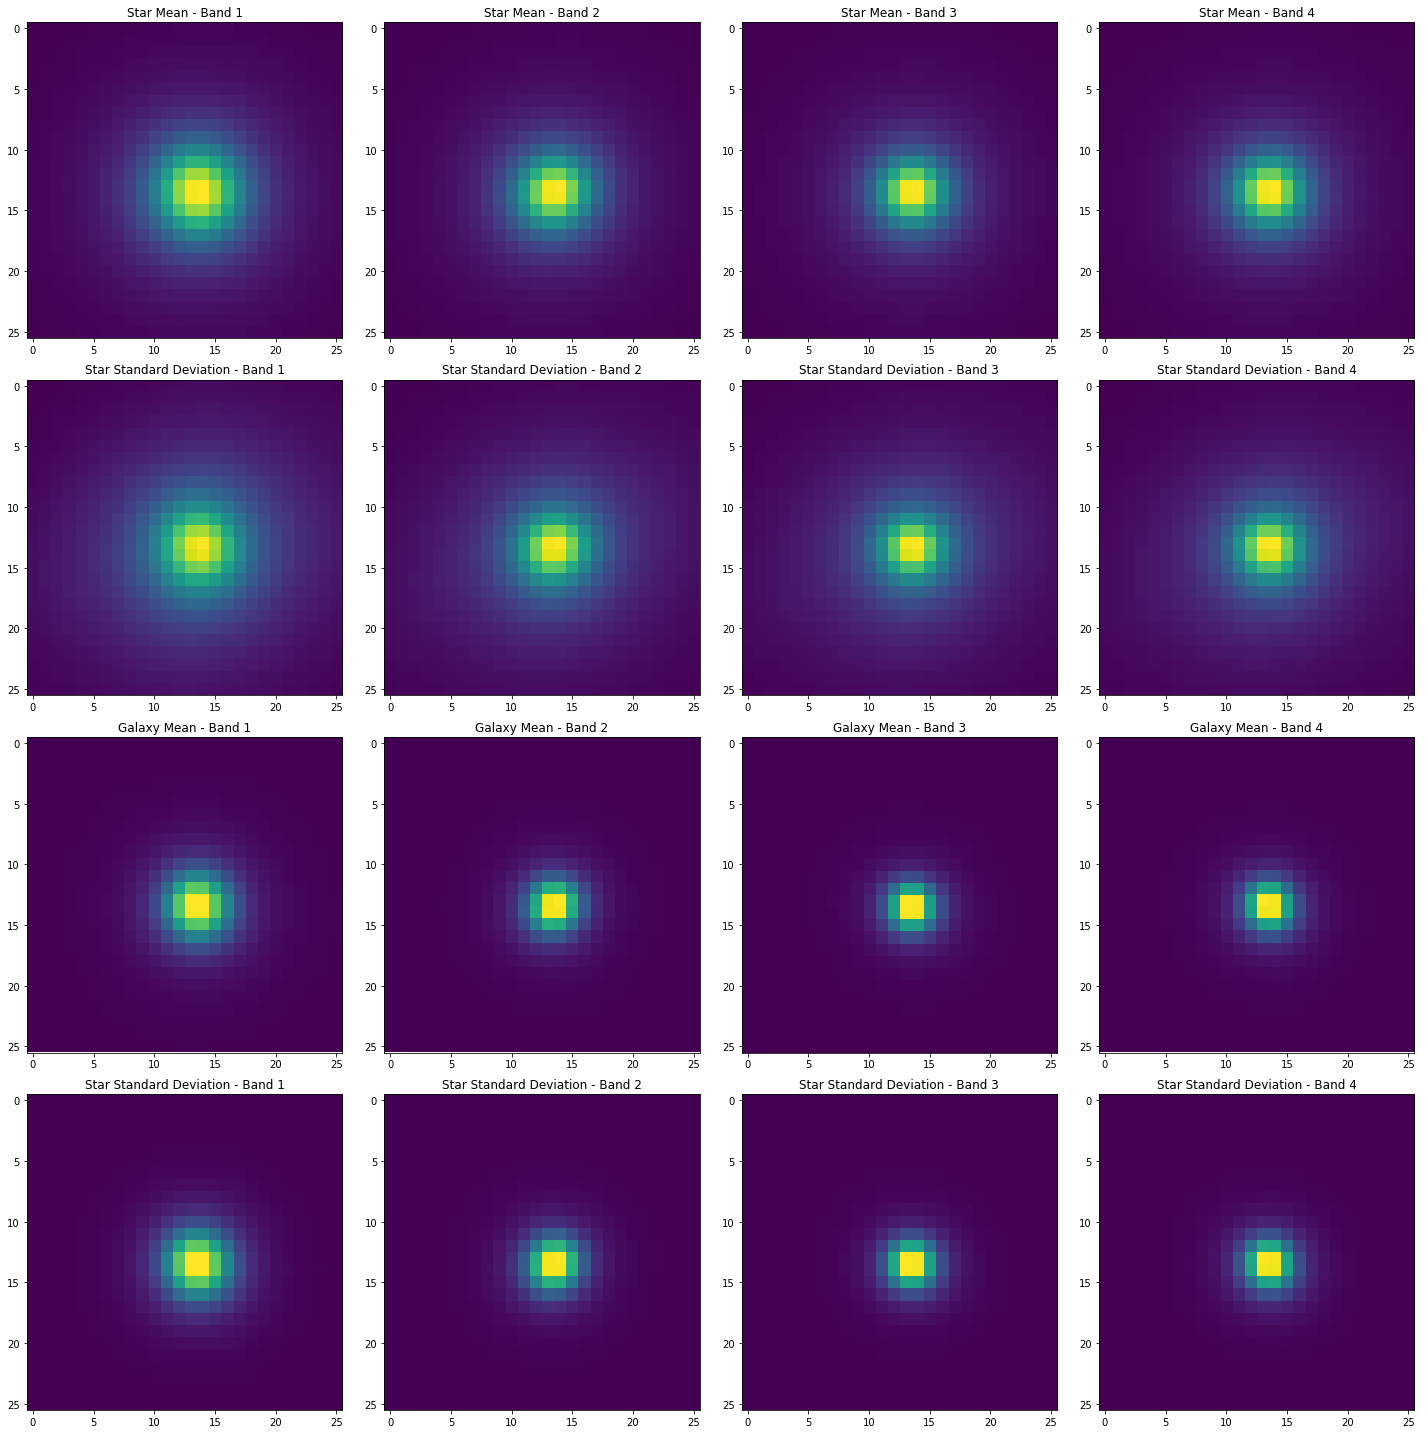

In [13]:
#Plotting mean images
figure, axis = plt.subplots(4, 4, figsize = (20, 20))
figure.tight_layout()

drawImage(mean_star, axis[0], "Star Mean")
drawImage(std_star, axis[1], "Star Standard Deviation")

drawImage(mean_galaxy, axis[2], "Galaxy Mean")
drawImage(std_galaxy, axis[3], "Star Standard Deviation")

From the analysis, we can infer that Star images from Band 1 - 4 are noticably brighter than Galaxy images from Band 1 - 4

Text(0.5,1,'Restored Image')

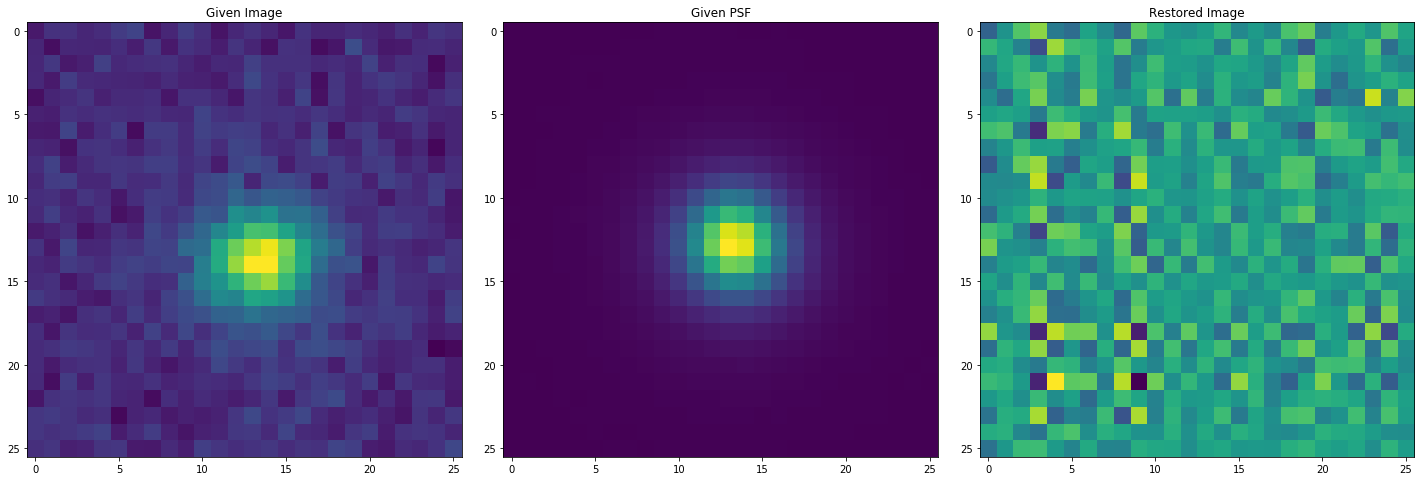

In [14]:
#Difference between observed image and original image
OBS_image = np.reshape(df.iloc[0, 1 : ].values[int(5408/8) * 0 : int(5408/8) * 1], (26, 26))
PSF_image = np.reshape(df.iloc[0, 1 : ].values[int(5408/8) * 4 : int(5408/8) * 5], (26, 26))

ORG_image = np.dot(OBS_image, np.linalg.inv(PSF_image))

figure, axis = plt.subplots(1, 3, figsize = (20, 20))
figure.tight_layout()

axis[0].imshow(OBS_image)
axis[0].set_title("Given Image")
axis[1].imshow(PSF_image)
axis[1].set_title("Given PSF")
axis[2].imshow(ORG_image)
axis[2].set_title("Restored Image")

An experiment to generate the point source object without the influence of blurness (PCF of the telescope). Not sure about credibility

### Model 0 : The Base

In [15]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns

# for evaluating the model
from sklearn.metrics import *
from tqdm import tqdm
import itertools
from itertools import chain, combinations

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [16]:
#Fixing randomness of training
torch.manual_seed(42)
split_seed = 42

In [17]:
#Reshaping the datasets
def dataset_reshape(bands, dataset_x, dataset_y) : 
    dataset_x = torch.tensor(dataset_x.values)
    dataset_x = dataset_x.reshape(len(dataset_x), 8, 26, 26)[ : , bands]
    dataset_y.astype(int)
    dataset_y = torch.tensor(dataset_y.values)
    dataset_y = dataset_y.reshape(len(dataset_y))

    return dataset_x, dataset_y

In [18]:
#Stratified splitting the dataset
def dataset_split(bands, normalization = 0, debug = False) : 
    train_x = df.iloc[ : , 1 : ]
    train_y = df.iloc[ : , : 1 ]

    if debug : print("----- Start Dataset Split -----")
    if normalization : 
        if debug : print("----- Dataset Normalized -----")
        for column in train_x.columns : 
            train_x[column] = (train_x[column] - train_x[column].mean()) / train_x[column].std()  
    
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.15, random_state= split_seed, stratify=train_y['y'])
    train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.15, random_state= split_seed, stratify=train_y['y'])
    if debug : print("Train Length : ", len(train_x), len(train_y))
    if debug : print("Validation Length : ", len(val_x), len(val_y))
    if debug : print("Test Length : ", len(test_x), len(test_y))
    if debug : print("----- End Dataset Split -----")

    if debug : print("----- Start Dataset Reshape -----")
    train_x, train_y = dataset_reshape(bands, train_x, train_y)
    val_x, val_y = dataset_reshape(bands, val_x, val_y) 
    test_x, test_y = dataset_reshape(bands, test_x, test_y)
    if debug : print("Train Shape : ", train_x.shape, train_y.shape)
    if debug : print("Validation Shape : ", val_x.shape, val_y.shape)
    if debug : print("Test Shape : ", test_x.shape, test_y.shape)
    if debug : print("----- End Dataset Reshape -----")
    
    return train_x, train_y, val_x, val_y, test_x, test_y

In [19]:
def dataset_batch(image, label, batch_size=1):
    l = len(image)
    for ndx in range(0, l, batch_size):
        yield image[ndx:min(ndx + batch_size, l)], label[ndx:min(ndx + batch_size, l)]

In [20]:
#Defining the CNN Model
class CNN(Module):   
    def __init__(self, num_channels):
        super(CNN, self).__init__()

        #Defining the layers
        self.convolutional_layers = Sequential(
            Conv2d(num_channels, 6, kernel_size=3, stride=1),
            BatchNorm2d(num_features=6),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=3, stride=1),
            
            Conv2d(6, 3, kernel_size=3, stride=1),
            BatchNorm2d(num_features=3),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=3, stride=1),
        )
        self.non_linear_layers = Sequential(
            Linear(in_features=972, out_features=2000),
            ReLU(inplace=True),
            Dropout(p=0.2),
            Linear(in_features=2000, out_features=1000),
            ReLU(inplace=True),
            Dropout(p=0.2),
            Linear(in_features=1000, out_features=500),
            ReLU(inplace=True),
            Dropout(p=0.2),
            Linear(in_features=500, out_features=2)
        )
        
    #Defining the forward pass    
    def forward(self, x):
        x = self.convolutional_layers(x)
        x = x.view(x.size(0), -1)
        x = self.non_linear_layers(x)
        return x

#### References : 

1. Conv2d - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
2. BatchNorm2d - https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
3. ReLU - https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
4. MaxPool2d - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
5. Dropout - https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
6. Linear - https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


7. Layer Arithmetics - https://arxiv.org/pdf/1603.07285v1.pdf
8. Gradient Descent - https://ruder.io/optimizing-gradient-descent/
9. CUDA Setting - https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [32]:
class TrainTest : 
    
    def __init__(self, bands = [i for i in range(8)], normalization = 0, learn_rate = 0.001, debug = False) :
        if debug : print("===== Initializing Dataset =====")
        self.in_train, self.actual_train, self.in_val, self.actual_val, self.in_test, self.actual_test = dataset_split(bands = bands, normalization = normalization, debug = debug) 
        if debug : print("===== Dataset Initialized =====")
        if debug : print("===== Initializing Model =====")
        self.model = CNN(num_channels = len(bands))
        if debug : print(self.model)
        if debug : print("===== Model Initialized =====")
        if debug : print("===== Optimizer Initialized =====")
        self.optimizer = Adam(self.model.parameters(), lr = learn_rate)
        if debug : print(self.optimizer)
        if debug : print("===== Loss Initialized =====")
        self.criterion = CrossEntropyLoss() 
        if debug : print(self.criterion)
        self.train_losses = []
        self.val_losses = []
        self.bands = bands
        self.epochs = 0
        self.figure, self.axis = plt.subplots(2, 2, figsize = (12, 12))
        self.figure.tight_layout(pad = 5)
        
    def train(self, epochs, batch_size = 256):
        self.epochs = epochs
        progress_bar = tqdm(range(epochs), desc="Training CNN")
        for each_epoch in progress_bar : 
            progress_bar.set_description("Bands : " + str(self.bands) + " Epoch : " + str(each_epoch + 1))
            suffled_idx = torch.randperm(len(self.in_train))
            in_train, actual_train = self.in_train[suffled_idx], self.actual_train[suffled_idx]

            #Batch-wise learning
            training_loss = 0
            for batch_in_train, batch_actual_train in dataset_batch(in_train, actual_train, batch_size = batch_size) :
                #Train the model
                self.model.train()

                batch_in_train, batch_actual_train = Variable(batch_in_train.float()), Variable(batch_actual_train)
                
                #Clearing the Gradients of the model parameters
                self.optimizer.zero_grad()

                #Prediction for training set
                batch_pred_train = self.model(batch_in_train)

                #Computing the training loss
                loss_train = self.criterion(batch_pred_train, batch_actual_train)

                #Computing the updated weights of all the model parameters
                loss_train.backward()
                self.optimizer.step()
                
                training_loss = training_loss + loss_train.item()
                progress_bar.set_postfix(loss=loss_train.item())
                
            self.train_losses.append(training_loss / batch_size)
            progress_bar.set_description("Batch Loss : ", training_loss / batch_size)            

            
            #Predict validation set
            in_val, actual_val = Variable(self.in_val.float()), Variable(self.actual_val)
            pred_val = self.model(in_val)
            loss_val = self.criterion(pred_val, actual_val)
            self.val_losses.append(loss_val)
            
            
        self.plot_loss()
                         
    def test(self, tradeoff = False) :
        
        #Avoiding unseen information
        if tradeoff : 
            self.figure.delaxes(self.axis[0][1])
            self.figure.delaxes(self.axis[1][0])
            self.figure.delaxes(self.axis[1][1])
            return

        #Prediction for testing set
        with torch.no_grad():
            pred_test = self.model(self.in_test.float())
        prob_predictions = torch.nn.functional.softmax(pred_test, dim = 1)
        prob_df = pd.DataFrame(prob_predictions)[1]
        prob_df = list(prob_df.values)
        predictions = np.argmax(prob_predictions, axis=1)
        
        #Accuracy on testing set
        self.plot_confusion_matrix(self.actual_test, predictions)
        self.plot_roc_curve(self.actual_test, prob_df)
        self.plot_pr_curve(self.actual_test, prob_df)
        
        correct_star = 0; correct_galaxy = 0; star_count = 0; galaxy_count = 0;
        print("Overall Accuracy : ", accuracy_score(predictions, self.actual_test) * 100)
        for index in range(len(self.actual_test)) : 
            if self.actual_test[index] == predictions[index] == 0 : correct_star += 1
            if self.actual_test[index] == 0 : star_count += 1
            if self.actual_test[index] == predictions[index] == 1 : correct_galaxy += 1
            if self.actual_test[index] == 1 : galaxy_count += 1

        print("Star Accuracy : ", (float(correct_star) / float(star_count)) * 100)
        print("Galaxy Accuracy : ", (float(correct_galaxy) / float(galaxy_count)) * 100)
        print("Precision : ", precision_score(predictions, self.actual_test) * 100)
        print("Recall : ", recall_score(predictions, self.actual_test) * 100)
        print("F-Measure : ", f1_score(predictions, self.actual_test) * 100)
        print(classification_report(predictions, self.actual_test, target_names= ["Star", "Galaxy"]))
        
    def plot_loss(self) : 
        #Plotting Training Loss vs Validation Loss       
        self.axis[0][0].plot(self.train_losses, label='Training loss')
        self.axis[0][0].plot(self.val_losses, label='Validation loss')
        self.axis[0][0].legend()
        self.axis[0][0].set_title("Training Loss vs Validation Loss")
        self.axis[0][0].set_xlabel("Epochs (#)")
        self.axis[0][0].set_ylabel("Loss (#)")
        self.axis[0][0].grid(True)
        
    def plot_confusion_matrix(self, actual_labels , predicted_labels) : 
        #Plotting Confusion Matrix on Test
        TN, FP, FN, TP = confusion_matrix(actual_labels, predicted_labels).ravel()
        HM_Value = np.asarray([TP, FN, FP, TN]).reshape(2, 2)
        labels = np.asarray([[str(TP) + "\nTrue Positive", str(FP) + "\nFalse Positive"], [str(FN) + "\nFalse Negative", str(TN) + "\nTrue Negative"]])
        sns.heatmap( HM_Value , annot=labels, linewidth = 0.5, fmt = '', cmap = 'Blues', ax = self.axis[0][1])
        self.axis[0][1].set_title( "Confusion Matrix on Test Set" )
        
    def plot_roc_curve(self, actual_labels, predicted_probs) : 
        #Plotting ROC curve
        false_positive_rates, true_positive_rates, thresholds = roc_curve(actual_labels, predicted_probs)
        self.axis[1][0].plot(false_positive_rates, true_positive_rates, linestyle='-', label = str(self.bands), color = "red")
        self.axis[1][0].plot([0, 1], [0, 1], "k--", label='Random guess')
        self.axis[1][0].set_xlabel("False Positive Rate")
        self.axis[1][0].set_ylabel("True Positive Rate")
        self.axis[1][0].set_title("ROC Curve - AUC : " + str(round(auc(false_positive_rates, true_positive_rates), 4)) + " (" + str(self.epochs) + " Epochs)")
        self.axis[1][0].legend()
        self.axis[1][0].grid(True)

    def plot_pr_curve(self, actual_labels, predicted_probs) : 
        #Plotting Precision Recall curve
        precision_rates, recall_rates, thresholds = precision_recall_curve(actual_labels, predicted_probs)
        self.axis[1][1].plot(recall_rates, precision_rates, linestyle='-', label=str(self.bands), color = "red")
        self.axis[1][1].plot([0, 1], [0.5, 0.5], "k--", label='Random guess')
        self.axis[1][1].set_xlabel("Recall")
        self.axis[1][1].set_ylabel("Precision")
        self.axis[1][1].set_title("Precision Recall Curve - AUC : " + str(round(auc(recall_rates, precision_rates), 4)) + " (" + str(self.epochs) + " Epochs)")
        self.axis[1][1].legend()
        self.axis[1][1].grid(True)
    

### Model 1 : Using all bands for classification

Batch Loss : : 100%|██████████| 50/50 [15:29<00:00, 18.58s/it, loss=0.0224]                                


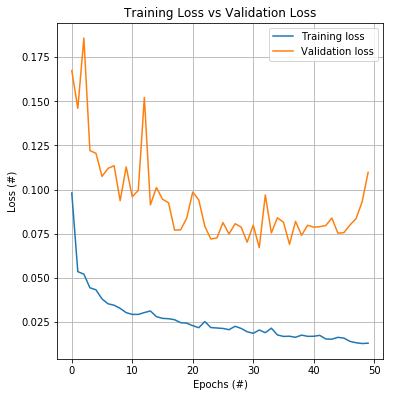

In [33]:
#Bias - Variance Tradeoff
model = TrainTest(normalization = 1)
model.train(epochs = 50)
model.test(tradeoff = True)

Batch Loss : : 100%|██████████| 30/30 [08:05<00:00, 16.18s/it, loss=0.0221]                               


('Overall Accuracy : ', 98.19975339087547)
('Star Accuracy : ', 99.83193277310924)
('Galaxy Accuracy : ', 95.88059701492537)
('Precision : ', 95.88059701492537)
('Recall : ', 99.75155279503105)
('F-Measure : ', 97.77777777777777)
              precision    recall  f1-score   support

        Star       1.00      0.97      0.98      2445
      Galaxy       0.96      1.00      0.98      1610

   micro avg       0.98      0.98      0.98      4055
   macro avg       0.98      0.98      0.98      4055
weighted avg       0.98      0.98      0.98      4055



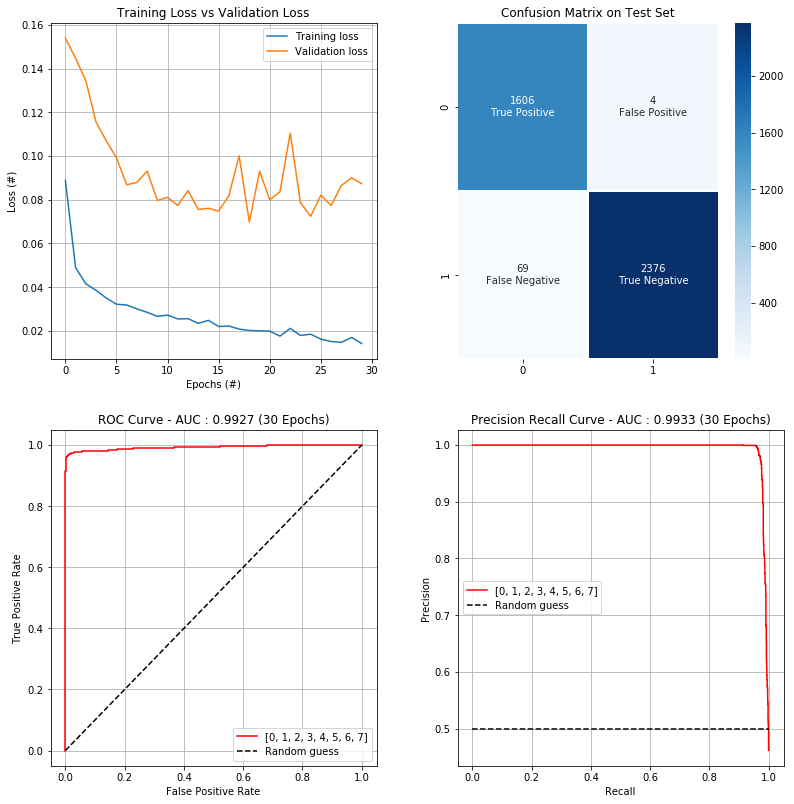

In [35]:
#Performing Analysis on all bands
model = TrainTest(normalization = 1)
model.train(epochs = 30) #Based on trade-off
model.test()

### Model 2 : Bands 1 - 4 for classification

Batch Loss : : 100%|██████████| 50/50 [07:55<00:00,  9.52s/it, loss=0.0205]                   


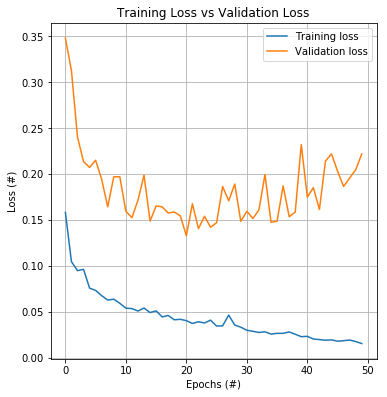

In [36]:
#Bias - Variance Tradeoff
model = TrainTest(bands = [0, 1, 2, 3], normalization = 1)
model.train(epochs = 50)
model.test(tradeoff = True)

Batch Loss : : 100%|██████████| 20/20 [02:57<00:00,  8.86s/it, loss=0.074]                   


('Overall Accuracy : ', 95.51171393341554)
('Star Accuracy : ', 99.45378151260505)
('Galaxy Accuracy : ', 89.91044776119404)
('Precision : ', 89.91044776119404)
('Recall : ', 99.14417379855168)
('F-Measure : ', 94.30181590482154)
              precision    recall  f1-score   support

        Star       0.99      0.93      0.96      2536
      Galaxy       0.90      0.99      0.94      1519

   micro avg       0.96      0.96      0.96      4055
   macro avg       0.95      0.96      0.95      4055
weighted avg       0.96      0.96      0.96      4055



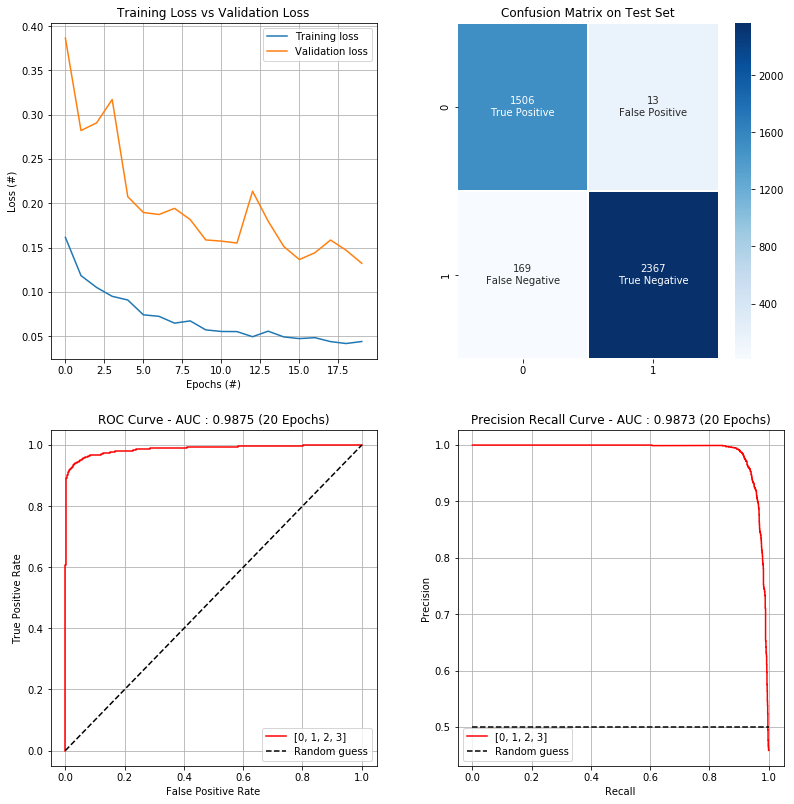

In [37]:
#Performing Analysis on selected bands
model = TrainTest(bands = [0, 1, 2, 3], normalization = 1)
model.train(epochs = 20) #Based on trade-off
model.test()

### Model 3 : Bands with corresponding Point Spred Functions

Batch Loss : : 100%|██████████| 50/50 [08:41<00:00, 10.44s/it, loss=0.125]             


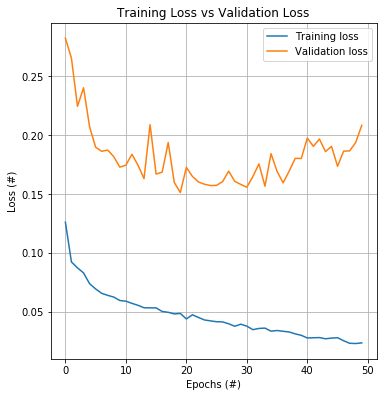

In [38]:
#Bias - Variance Tradeoff
model = TrainTest(bands = [0, 4], normalization = 1)
model.train(epochs = 50)
model.test(tradeoff = True)

Batch Loss : : 100%|██████████| 20/20 [04:27<00:00, 13.35s/it, loss=0.0978]            


('Overall Accuracy : ', 94.74722564734896)
('Star Accuracy : ', 99.41176470588235)
('Galaxy Accuracy : ', 88.11940298507463)
('Precision : ', 88.11940298507463)
('Recall : ', 99.06040268456375)
('F-Measure : ', 93.27014218009478)
              precision    recall  f1-score   support

        Star       0.99      0.92      0.96      2565
      Galaxy       0.88      0.99      0.93      1490

   micro avg       0.95      0.95      0.95      4055
   macro avg       0.94      0.96      0.94      4055
weighted avg       0.95      0.95      0.95      4055



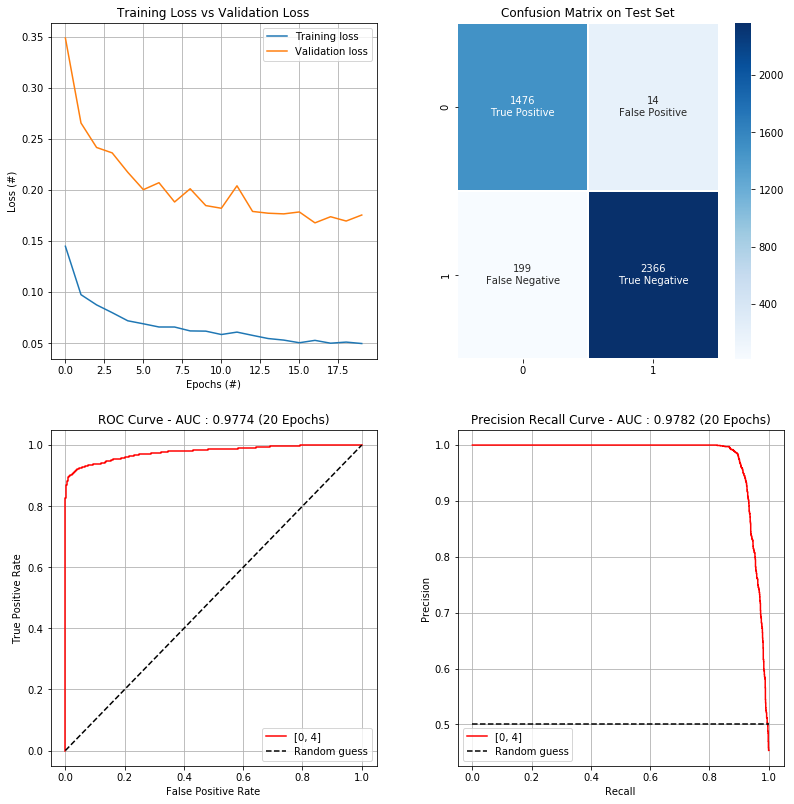

In [42]:
#Performing Analysis on selected bands
model = TrainTest(bands = [0, 4], normalization = 1)
model.train(epochs = 20) #Based on trade-off
model.test()

Batch Loss : : 100%|██████████| 50/50 [07:18<00:00,  8.77s/it, loss=0.0112]             


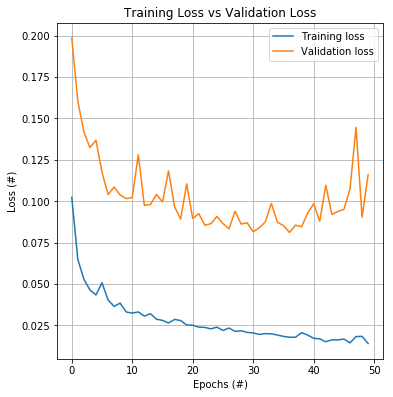

In [39]:
#Bias - Variance Tradeoff
model = TrainTest(bands = [1, 5], normalization = 1)
model.train(epochs = 50)
model.test(tradeoff = True)

Batch Loss : : 100%|██████████| 30/30 [06:23<00:00, 12.79s/it, loss=0.106]              


('Overall Accuracy : ', 97.21331689272503)
('Star Accuracy : ', 97.22689075630252)
('Galaxy Accuracy : ', 97.19402985074626)
('Precision : ', 97.19402985074626)
('Recall : ', 96.1038961038961)
('F-Measure : ', 96.64588898783022)
              precision    recall  f1-score   support

        Star       0.97      0.98      0.98      2361
      Galaxy       0.97      0.96      0.97      1694

   micro avg       0.97      0.97      0.97      4055
   macro avg       0.97      0.97      0.97      4055
weighted avg       0.97      0.97      0.97      4055



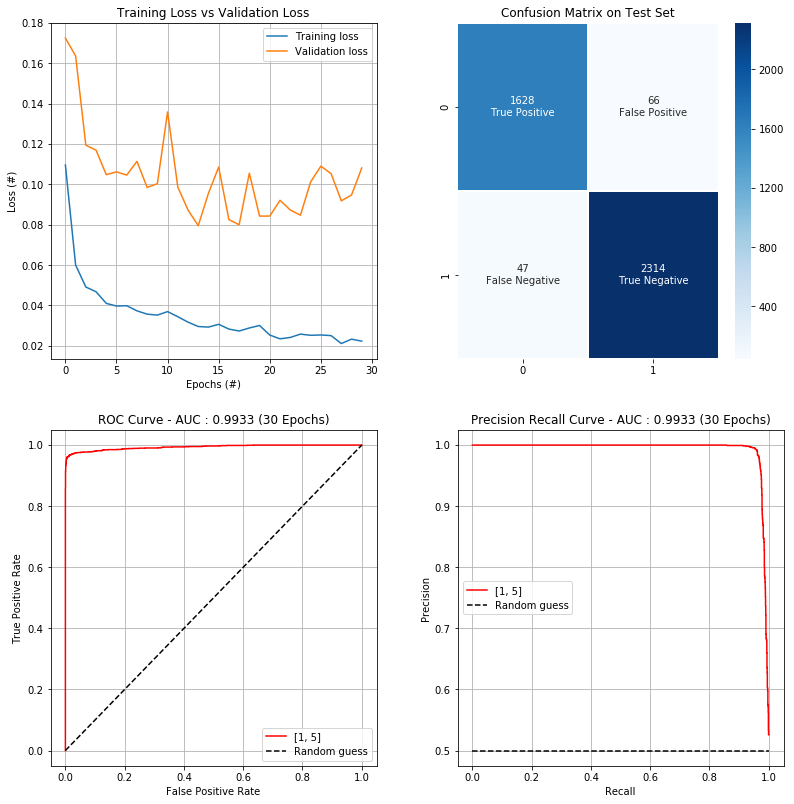

In [43]:
#Performing Analysis on selected bands
model = TrainTest(bands = [1, 5], normalization = 1)
model.train(epochs = 30) #Based on trade-off
model.test()

Batch Loss : : 100%|██████████| 50/50 [07:36<00:00,  9.14s/it, loss=0.00948]            


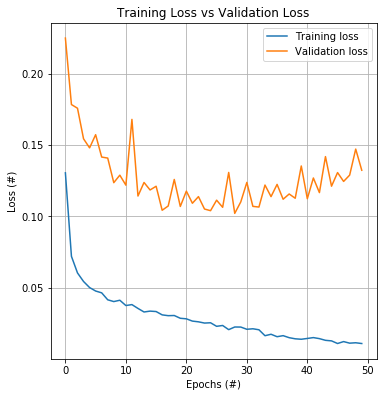

In [40]:
#Bias - Variance Tradeoff
model = TrainTest(bands = [2, 6], normalization = 1)
model.train(epochs = 50)
model.test(tradeoff = True)

Batch Loss : : 100%|██████████| 25/25 [07:31<00:00, 18.05s/it, loss=0.0548]             


('Overall Accuracy : ', 96.96670776818742)
('Star Accuracy : ', 98.61344537815127)
('Galaxy Accuracy : ', 94.6268656716418)
('Precision : ', 94.6268656716418)
('Recall : ', 97.96044499381952)
('F-Measure : ', 96.26480412997266)
              precision    recall  f1-score   support

        Star       0.99      0.96      0.97      2437
      Galaxy       0.95      0.98      0.96      1618

   micro avg       0.97      0.97      0.97      4055
   macro avg       0.97      0.97      0.97      4055
weighted avg       0.97      0.97      0.97      4055



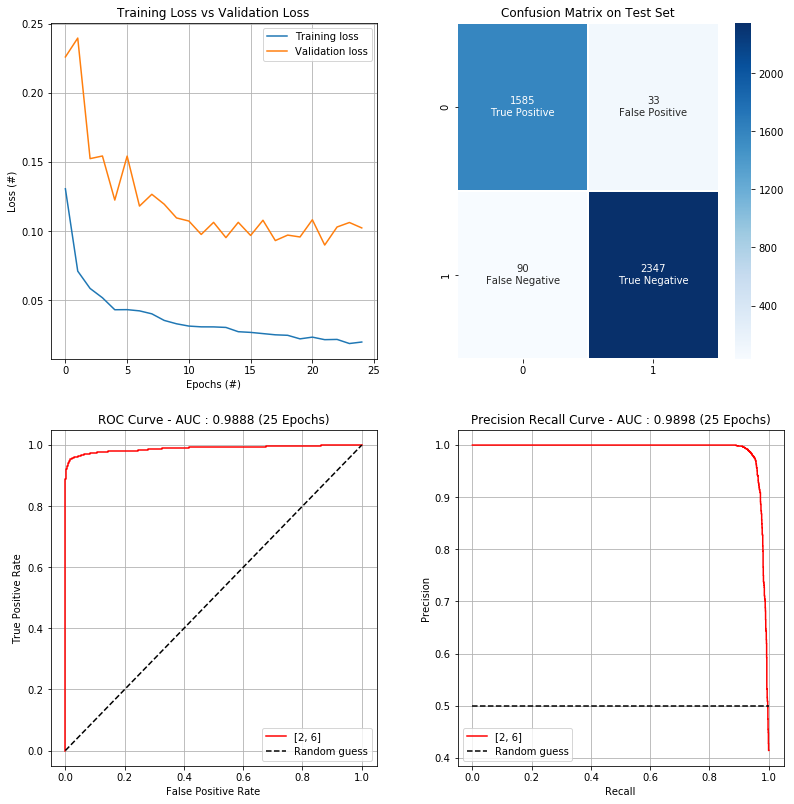

In [44]:
#Performing Analysis on selected bands
model = TrainTest(bands = [2, 6], normalization = 1)
model.train(epochs = 25) #Based on trade-off
model.test()

Batch Loss : : 100%|██████████| 50/50 [12:19<00:00, 14.80s/it, loss=0.0083]              


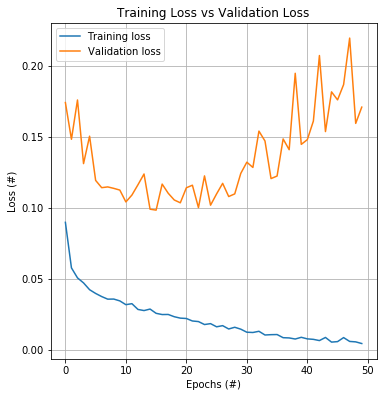

In [41]:
#Bias - Variance Tradeoff
model = TrainTest(bands = [3, 7], normalization = 1)
model.train(epochs = 50)
model.test(tradeoff = True)

Batch Loss : : 100%|██████████| 25/25 [07:27<00:00, 17.89s/it, loss=0.0819]            


('Overall Accuracy : ', 97.4845869297164)
('Star Accuracy : ', 99.53781512605042)
('Galaxy Accuracy : ', 94.56716417910448)
('Precision : ', 94.56716417910448)
('Recall : ', 99.3103448275862)
('F-Measure : ', 96.88073394495412)
              precision    recall  f1-score   support

        Star       1.00      0.96      0.98      2460
      Galaxy       0.95      0.99      0.97      1595

   micro avg       0.97      0.97      0.97      4055
   macro avg       0.97      0.98      0.97      4055
weighted avg       0.98      0.97      0.97      4055



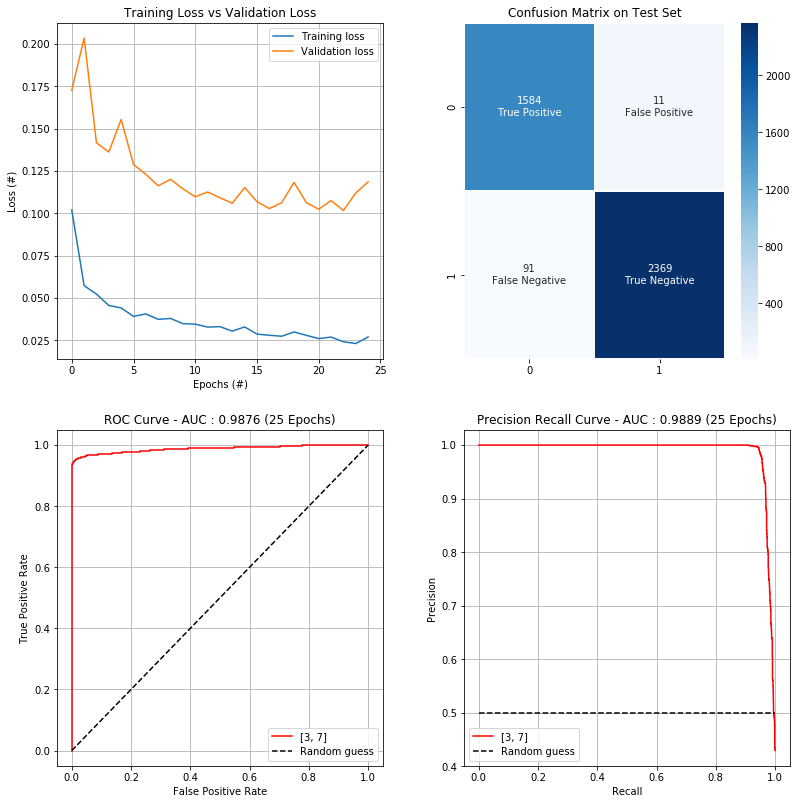

In [45]:
#Performing Analysis on selected bands
model = TrainTest(bands = [3, 7], normalization = 1)
model.train(epochs = 20) #Based on trade-off
model.test()

The Bands individually with the PCF is sufficient to classify the NEO as either Star or Galaxy. All the different models have **almost similar performance**